## Importing basic data handling and data visualisation libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Importing data cleaning and transformation libraries

In [2]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Loading the dataset

In [3]:
data = pd.read_csv("HTQ04.20241024104833.csv")

In [4]:
data.sample(10)

,C02163V02608,Method of Booking,C02276V02746,Domestic or Outbound,TLIST(Q1),Quarter,STATISTIC,Statistic Label,UNIT,VALUE
1127,6,Direct,2,Outbound,20054,2005Q4,HTQ04C3,Average Length of Stay by Irish Residents,Nights per Trip,6.0
1167,6,Direct,2,Outbound,20092,2009Q2,HTQ04C1,Number of Trips by Irish Residents,Thousand,111.0
1263,7,Privately booked/No pre-booking,2,Outbound,20032,2003Q2,HTQ04C1,Number of Trips by Irish Residents,Thousand,668.0
1106,6,Direct,2,Outbound,20041,2004Q1,HTQ04C3,Average Length of Stay by Irish Residents,Nights per Trip,NaN
916,5,Internet,1,Domestic,20092,2009Q2,HTQ04C2,Number of Nights by Irish Residents,Thousand,1415.0
1031,6,Direct,1,Domestic,20044,2004Q4,HTQ04C3,Average Length of Stay by Irish Residents,Nights per Trip,NaN
1103,6,Direct,2,Outbound,20034,2003Q4,HTQ04C3,Average Length of Stay by Irish Residents,Nights per Trip,NaN
1331,7,Privately booked/No pre-booking,2,Outbound,20084,2008Q4,HTQ04C3,Average Length of Stay by Irish Residents,Nights per Trip,NaN
782,4,Club,2,Outbound,20051,2005Q1,HTQ04C3,Average Length of Stay by Irish Residents,Nights per Trip,5.3
24,-,All methods of booking,1,Domestic,20051,2005Q1,HTQ04C1,Number of Trips by Irish Residents,Thousand,1490.0


## Data exploration

In [5]:
data.shape

(1344, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   C02163V02608          1344 non-null   object 
 1   Method of Booking     1344 non-null   object 
 2   C02276V02746          1344 non-null   int64  
 3   Domestic or Outbound  1344 non-null   object 
 4   TLIST(Q1)             1344 non-null   int64  
 5   Quarter               1344 non-null   object 
 6   STATISTIC             1344 non-null   object 
 7   Statistic Label       1344 non-null   object 
 8   UNIT                  1344 non-null   object 
 9   VALUE                 1080 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 105.1+ KB


In [7]:
data.dtypes

C02163V02608             object
Method of Booking        object
C02276V02746              int64
Domestic or Outbound     object
TLIST(Q1)                 int64
Quarter                  object
STATISTIC                object
Statistic Label          object
UNIT                     object
VALUE                   float64
dtype: object

## Data Preprocessing and cleaning

### Dropping irrelevant columns

In [8]:
data = data.drop(columns = ['C02163V02608', 'C02276V02746', 'TLIST(Q1)', 'STATISTIC'])

In [9]:
data.sample(10)

,Method of Booking,Domestic or Outbound,Quarter,Statistic Label,UNIT,VALUE
1006,Internet,Outbound,2009Q4,Number of Nights by Irish Residents,Thousand,6982.0
74,All methods of booking,Domestic,2009Q1,Average Length of Stay by Irish Residents,Nights per Trip,2.4
301,Travel agent,Outbound,2007Q1,Number of Nights by Irish Residents,Thousand,2554.0
717,Club,Domestic,2006Q4,Number of Trips by Irish Residents,Thousand,33.0
306,Travel agent,Outbound,2007Q3,Number of Trips by Irish Residents,Thousand,606.0
928,Internet,Outbound,2003Q2,Number of Nights by Irish Residents,Thousand,NaN
697,Club,Domestic,2005Q1,Number of Nights by Irish Residents,Thousand,118.0
849,Internet,Domestic,2003Q4,Number of Trips by Irish Residents,Thousand,NaN
969,Internet,Outbound,2006Q4,Number of Trips by Irish Residents,Thousand,1067.0
1234,Privately booked/No pre-booking,Domestic,2007Q4,Number of Nights by Irish Residents,Thousand,NaN


In [10]:
data.shape

(1344, 6)

### Checking Missing values

In [11]:
data.isnull().sum()

Method of Booking         0
Domestic or Outbound      0
Quarter                   0
Statistic Label           0
UNIT                      0
VALUE                   264
dtype: int64

### Segmenting the 'VALUE'column into three different columns based Statistic Label

In [12]:
print(data['Statistic Label'].unique())

['Number of Trips by Irish Residents'
 'Number of Nights by Irish Residents'
 'Average Length of Stay by Irish Residents']


In [13]:
df_trips = data[data['Statistic Label'] == 'Number of Trips by Irish Residents']

df_nights = data[data['Statistic Label'] == 'Number of Nights by Irish Residents']

df_stay = data[data['Statistic Label'] == 'Average Length of Stay by Irish Residents']

In [14]:
df_trips.sample(10)

,Method of Booking,Domestic or Outbound,Quarter,Statistic Label,UNIT,VALUE
1272,Privately booked/No pre-booking,Outbound,2004Q1,Number of Trips by Irish Residents,Thousand,701.0
294,Travel agent,Outbound,2006Q3,Number of Trips by Irish Residents,Thousand,621.0
1242,Privately booked/No pre-booking,Domestic,2008Q3,Number of Trips by Irish Residents,Thousand,NaN
1053,Direct,Domestic,2006Q4,Number of Trips by Irish Residents,Thousand,479.0
192,Travel agent,Domestic,2005Q1,Number of Trips by Irish Residents,Thousand,40.0
1215,Privately booked/No pre-booking,Domestic,2006Q2,Number of Trips by Irish Residents,Thousand,1585.0
306,Travel agent,Outbound,2007Q3,Number of Trips by Irish Residents,Thousand,606.0
240,Travel agent,Domestic,2009Q1,Number of Trips by Irish Residents,Thousand,13.0
1128,Direct,Outbound,2006Q1,Number of Trips by Irish Residents,Thousand,69.0
834,Club,Outbound,2009Q3,Number of Trips by Irish Residents,Thousand,29.0


In [15]:
df_nights.sample(10)

,Method of Booking,Domestic or Outbound,Quarter,Statistic Label,UNIT,VALUE
268,Travel agent,Outbound,2004Q2,Number of Nights by Irish Residents,Thousand,5272.0
1018,Direct,Domestic,2003Q4,Number of Nights by Irish Residents,Thousand,NaN
1204,Privately booked/No pre-booking,Domestic,2005Q2,Number of Nights by Irish Residents,Thousand,4645.0
193,Travel agent,Domestic,2005Q1,Number of Nights by Irish Residents,Thousand,106.0
811,Club,Outbound,2007Q3,Number of Nights by Irish Residents,Thousand,238.0
1273,Privately booked/No pre-booking,Outbound,2004Q1,Number of Nights by Irish Residents,Thousand,5020.0
400,No pre-booking,Domestic,2008Q2,Number of Nights by Irish Residents,Thousand,2509.0
466,No pre-booking,Outbound,2006Q4,Number of Nights by Irish Residents,Thousand,212.0
277,Travel agent,Outbound,2005Q1,Number of Nights by Irish Residents,Thousand,2399.0
367,No pre-booking,Domestic,2005Q3,Number of Nights by Irish Residents,Thousand,NaN


In [16]:
df_stay.sample(10)

,Method of Booking,Domestic or Outbound,Quarter,Statistic Label,UNIT,VALUE
71,All methods of booking,Domestic,2008Q4,Average Length of Stay by Irish Residents,Nights per Trip,2.5
1061,Direct,Domestic,2007Q2,Average Length of Stay by Irish Residents,Nights per Trip,3.0
1064,Direct,Domestic,2007Q3,Average Length of Stay by Irish Residents,Nights per Trip,4.4
1208,Privately booked/No pre-booking,Domestic,2005Q3,Average Length of Stay by Irish Residents,Nights per Trip,4.7
779,Club,Outbound,2004Q4,Average Length of Stay by Irish Residents,Nights per Trip,4.9
365,No pre-booking,Domestic,2005Q2,Average Length of Stay by Irish Residents,Nights per Trip,NaN
113,All methods of booking,Outbound,2005Q2,Average Length of Stay by Irish Residents,Nights per Trip,8.8
833,Club,Outbound,2009Q2,Average Length of Stay by Irish Residents,Nights per Trip,7.0
686,Club,Domestic,2004Q1,Average Length of Stay by Irish Residents,Nights per Trip,2.7
338,No pre-booking,Domestic,2003Q1,Average Length of Stay by Irish Residents,Nights per Trip,NaN


### Removing missing values from the three segmented dataframe

In [17]:
# df_trips datafrme

In [18]:
df_trips.isnull().sum()

Method of Booking        0
Domestic or Outbound     0
Quarter                  0
Statistic Label          0
UNIT                     0
VALUE                   88
dtype: int64

In [19]:
df_trips['VALUE'] = df_trips['VALUE'].fillna(df_trips['VALUE'].mean())

In [20]:
df_trips.isnull().sum()

Method of Booking       0
Domestic or Outbound    0
Quarter                 0
Statistic Label         0
UNIT                    0
VALUE                   0
dtype: int64

In [21]:
# df_nights data frame

In [22]:
df_nights.isnull().sum()

Method of Booking        0
Domestic or Outbound     0
Quarter                  0
Statistic Label          0
UNIT                     0
VALUE                   88
dtype: int64

In [23]:
df_nights['VALUE'] = df_nights['VALUE'].fillna(df_nights['VALUE'].mean())

In [24]:
df_nights.isnull().sum()

Method of Booking       0
Domestic or Outbound    0
Quarter                 0
Statistic Label         0
UNIT                    0
VALUE                   0
dtype: int64

In [25]:
# df_stay datafrme

In [26]:
df_stay.isnull().sum()

Method of Booking        0
Domestic or Outbound     0
Quarter                  0
Statistic Label          0
UNIT                     0
VALUE                   88
dtype: int64

In [27]:
df_stay['VALUE'] = df_stay['VALUE'].fillna(df_stay['VALUE'].mean())

In [28]:
df_stay.isnull().sum()

Method of Booking       0
Domestic or Outbound    0
Quarter                 0
Statistic Label         0
UNIT                    0
VALUE                   0
dtype: int64

### Concating these three dataframe

In [29]:
df_merged = pd.concat([df_trips, df_nights, df_stay])

In [30]:
df_merged

,Method of Booking,Domestic or Outbound,Quarter,Statistic Label,UNIT,VALUE
0,All methods of booking,Domestic,2003Q1,Number of Trips by Irish Residents,Thousand,1447.000000
3,All methods of booking,Domestic,2003Q2,Number of Trips by Irish Residents,Thousand,1509.000000
6,All methods of booking,Domestic,2003Q3,Number of Trips by Irish Residents,Thousand,2087.000000
9,All methods of booking,Domestic,2003Q4,Number of Trips by Irish Residents,Thousand,1614.000000
12,All methods of booking,Domestic,2004Q1,Number of Trips by Irish Residents,Thousand,1585.000000
...,...,...,...,...,...,...
1331,Privately booked/No pre-booking,Outbound,2008Q4,Average Length of Stay by Irish Residents,Nights per Trip,5.143028
1334,Privately booked/No pre-booking,Outbound,2009Q1,Average Length of Stay by Irish Residents,Nights per Trip,5.143028
1337,Privately booked/No pre-booking,Outbound,2009Q2,Average Length of Stay by Irish Residents,Nights per Trip,5.143028
1340,Privately booked/No pre-booking,Outbound,2009Q3,Average Length of Stay by Irish Residents,Nights per Trip,5.143028


## Descriptive Statistis and visualisations

In [31]:
df_merged.describe()

,VALUE
count,1344.000000
mean,1298.323602
std,2742.378258
min,1.800000
25%,6.200000
50%,133.000000
75%,1214.000000
max,23485.000000


In [32]:
# Line Chart for Number of Trips Over Time (Domestic)

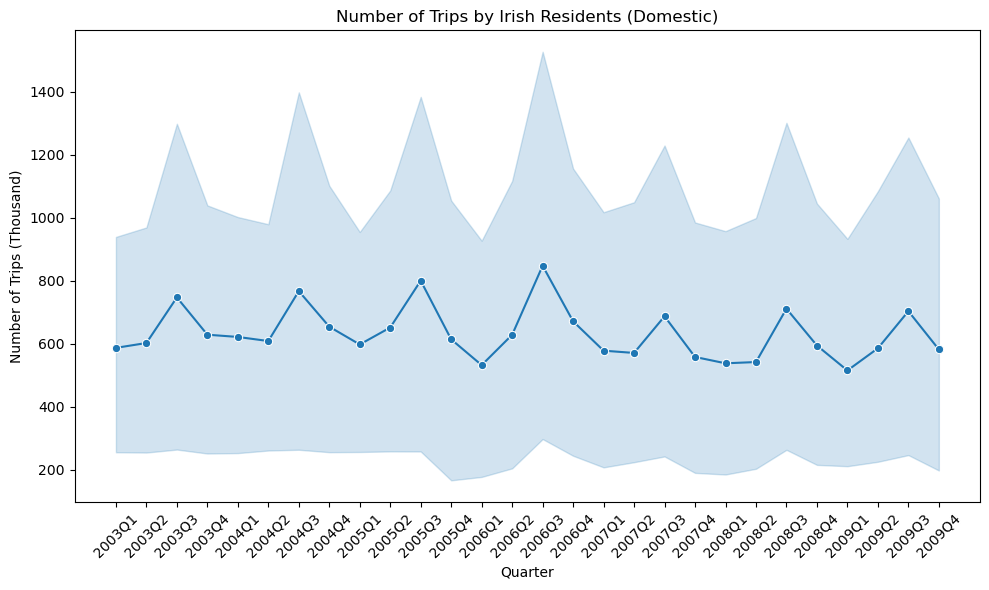

In [33]:
# Filter for Domestic and 'Number of Trips by Irish Residents'
df_domestic_trips = df_merged[(df_merged['Domestic or Outbound'] == 'Domestic') & 
                              (df_merged['Statistic Label'] == 'Number of Trips by Irish Residents')]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_domestic_trips, x='Quarter', y='VALUE', marker='o')
plt.title('Number of Trips by Irish Residents (Domestic)')
plt.xlabel('Quarter')
plt.ylabel('Number of Trips (Thousand)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

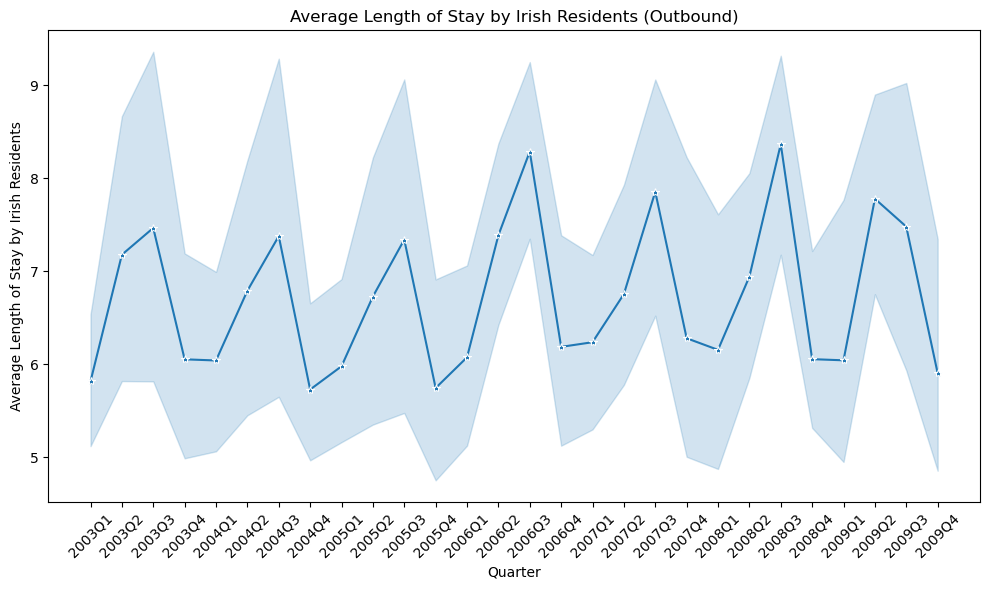

In [34]:
# Filter for Domestic and 'Number of Trips by Irish Residents'
df_domestic_trips = df_merged[(df_merged['Domestic or Outbound'] == 'Outbound') & 
                              (df_merged['Statistic Label'] == 'Average Length of Stay by Irish Residents')]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_domestic_trips, x='Quarter', y='VALUE', marker='*')
plt.title('Average Length of Stay by Irish Residents (Outbound)')
plt.xlabel('Quarter')
plt.ylabel('Average Length of Stay by Irish Residents')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [35]:
# Stacked Bar Chart for Quarterly Travel Statistics

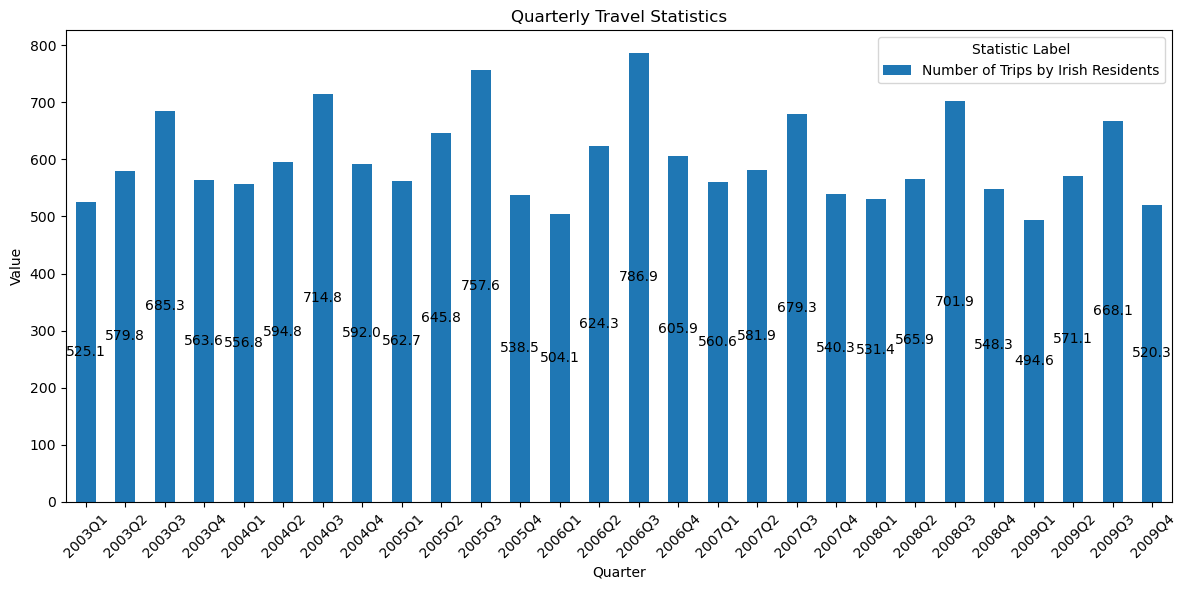

In [36]:
# Filter for 'Number of Trips' and 'Average Length of Stay'
df_quarterly = df_merged[(df_merged['Statistic Label'].isin(
    ['Number of Trips by Irish Residents']))]

# Pivot the data for a stacked bar chart
df_pivot = df_quarterly.pivot_table(index='Quarter', columns='Statistic Label', values='VALUE').fillna(0)

# Plot
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Quarterly Travel Statistics')
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Adding data labels
for i, bars in enumerate(plt.gca().containers):
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2 + bar.get_y(), 
                 f'{bar.get_height():.1f}', ha='center', va='center')

plt.tight_layout()
plt.show()

## Discrete distributions (Binomial and/or Poisson)

In [37]:
# Statistical Distribution of Number of Trips

Mean: 600.0583333333333
Median: 570.5
Mode: 600.0583333333333
Standard Deviation: 618.1255958889465
Kurtosis: 0.47369862410453933


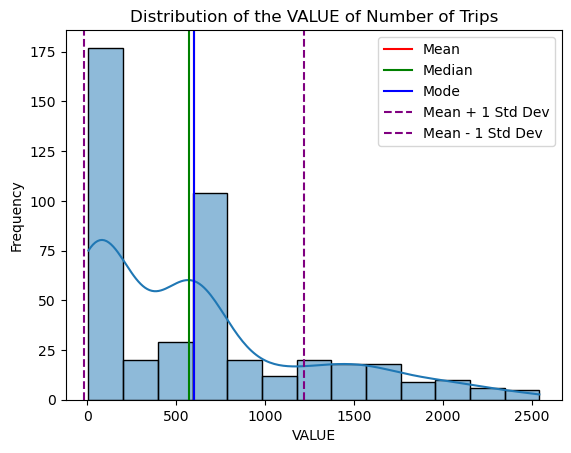

In [38]:
sns.histplot(df_trips['VALUE'], kde=True)

plt.title('Distribution of the VALUE of Number of Trips')
plt.xlabel('VALUE')
plt.ylabel('Frequency')

print('Mean:', df_trips['VALUE'].mean())
print('Median:', df_trips['VALUE'].median())
print('Mode:', df_trips['VALUE'].mode()[0])
print('Standard Deviation:', df_trips['VALUE'].std())
print('Kurtosis:', df_trips['VALUE'].kurtosis())

VALUE_mean = df_trips['VALUE'].mean()
VALUE_median = df_trips['VALUE'].median()
VALUE_mode = df_trips['VALUE'].mode().values[0]
VALUE_std = df_trips['VALUE'].std()
VALUE_kurtosis = df_trips['VALUE'].kurtosis()

# Plotting vertical lines for mean, median, mode, and standard deviation
plt.axvline(VALUE_mean, color='red', linestyle='-', label='Mean')
plt.axvline(VALUE_median, color='green', linestyle='-', label='Median')
plt.axvline(VALUE_mode, color='blue', linestyle='-', label='Mode')
plt.axvline(VALUE_mean + VALUE_std, color='purple', linestyle='--', label='Mean + 1 Std Dev')
plt.axvline(VALUE_mean - VALUE_std, color='purple', linestyle='--', label='Mean - 1 Std Dev')


plt.legend()


plt.show()

In [39]:
from scipy.stats import shapiro
# shapiro-wilk test on VALUE column of df_trips
stat, p = shapiro(df_trips['VALUE'])

# Using f-string to print out the test statistics and p-value
print(f'Shapiro-Wilk test: Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting p-value
if p > 0.05:
    print('The null hypothesis of normality is supported.')
else:
    print('Null hypothesis of normality is rejected as p-value is less than the level of significance of 0.05.')

Shapiro-Wilk test: Statistics=0.840, p=0.000
Null hypothesis of normality is rejected as p-value is less than the level of significance of 0.05.


In [40]:
# Statistical Distribution of Average Length of Stay

Mean: 5.143027777777779
Median: 5.143027777777778
Mode: 5.143027777777778
Standard Deviation: 2.273137558924818
Kurtosis: 0.17837147815638899


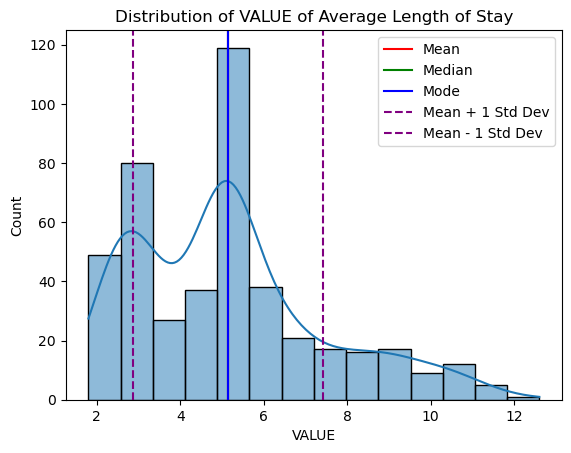

In [41]:
# Plotting a histogram of the 'VALUE' column
sns.histplot(df_stay['VALUE'], kde=True)


plt.title('Distribution of VALUE of Average Length of Stay')
plt.xlabel('VALUE')
plt.ylabel('Count')

# Printing the mean, median, mode, standard deviation, and kurtosis of the 'VALUE' column
print('Mean:', df_stay['VALUE'].mean())
print('Median:', df_stay['VALUE'].median())
print('Mode:', df_stay['VALUE'].mode()[0])
print('Standard Deviation:', df_stay['VALUE'].std())
print('Kurtosis:', df_stay['VALUE'].kurtosis())

# Calculating mean, median, mode, standard deviation, and kurtosis of the 'VALUE' column
VALUE_mean = df_stay['VALUE'].mean()
VALUE_median = df_stay['VALUE'].median()
VALUE_mode = df_stay['VALUE'].mode().values[0]
VALUE_std = df_stay['VALUE'].std()
VALUE_kurtosis = df_stay['VALUE'].kurtosis()

# Plotting vertical lines for mean, median, mode, and standard deviation
plt.axvline(VALUE_mean, color='red', linestyle='-', label='Mean')
plt.axvline(VALUE_median, color='green', linestyle='-', label='Median')
plt.axvline(VALUE_mode, color='blue', linestyle='-', label='Mode')
plt.axvline(VALUE_mean + VALUE_std, color='purple', linestyle='--', label='Mean + 1 Std Dev')
plt.axvline(VALUE_mean - VALUE_std, color='purple', linestyle='--', label='Mean - 1 Std Dev')


plt.legend()
plt.show()

In [42]:
# Application on the concept of Normal distribution

Mean: 1298.3236018518517
Median: 133.0
Mode: 5.143027777777778
Standard Deviation: 2742.378258475462
Kurtosis: 17.90502225278341


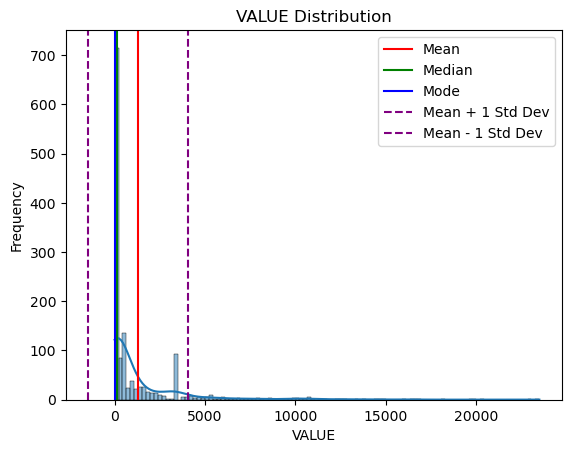

In [43]:
# Plotting a histogram of the 'VALUE' column using seaborn with kernel density estimation (kde) enabled
sns.histplot(df_merged['VALUE'], kde=True)


plt.title('VALUE Distribution')
plt.xlabel('VALUE')
plt.ylabel('Frequency')

# Printing the mean, median, mode, standard deviation, and kurtosis of the 'VALUE' column
print('Mean:', df_merged['VALUE'].mean())
print('Median:', df_merged['VALUE'].median())
print('Mode:', df_merged['VALUE'].mode()[0])
print('Standard Deviation:', df_merged['VALUE'].std())
print('Kurtosis:', df_merged['VALUE'].kurtosis())

# Calculating mean, median, mode, standard deviation, and kurtosis of the 'VALUE' column
age_mean = df_merged['VALUE'].mean()
age_median = df_merged['VALUE'].median()
age_mode = df_merged['VALUE'].mode().values[0]
age_std = df_merged['VALUE'].std()
age_kurtosis = df_merged['VALUE'].kurtosis()

# Plotting vertical lines for mean, median, mode, and standard deviation
plt.axvline(age_mean, color='red', linestyle='-', label='Mean')
plt.axvline(age_median, color='green', linestyle='-', label='Median')
plt.axvline(age_mode, color='blue', linestyle='-', label='Mode')
plt.axvline(age_mean + age_std, color='purple', linestyle='--', label='Mean + 1 Std Dev')
plt.axvline(age_mean - age_std, color='purple', linestyle='--', label='Mean - 1 Std Dev')


plt.legend()
plt.show()

In [44]:
# Conduction of Shapiro-Wilk test for checking Normality of the distribution

In [45]:
stat, p = shapiro(data['VALUE'])

print(f'Shapiro-Wilk test: Statistics=%.3f, p=%.3f' % (stat, p))
# Defining the significance level (alpha)
alpha = 0.05

if p > alpha:
    print('The considered Sample has followed a Gaussian distribution (fail to reject H0)')
else:
    print('The considered Sample does not follow a Gaussian distribution (reject H0)')

Shapiro-Wilk test: Statistics=nan, p=nan
The considered Sample does not follow a Gaussian distribution (reject H0)


## Exploratory data Analysis

In [46]:
# Pie Chart for Proportion of Booking Methods

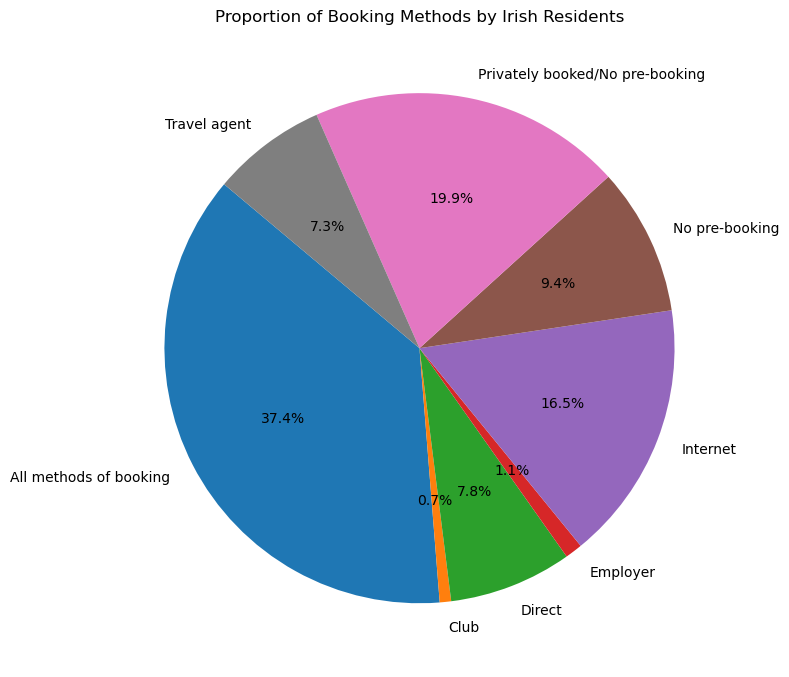

In [47]:
# Group by 'Method of Booking' and sum 'VALUE'
df_booking = df_merged.groupby('Method of Booking')['VALUE'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(df_booking['VALUE'], labels=df_booking['Method of Booking'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Booking Methods by Irish Residents')

plt.tight_layout()
plt.show()

In [48]:
# Bar Chart for Booking Methods (Outbound vs. Domestic)

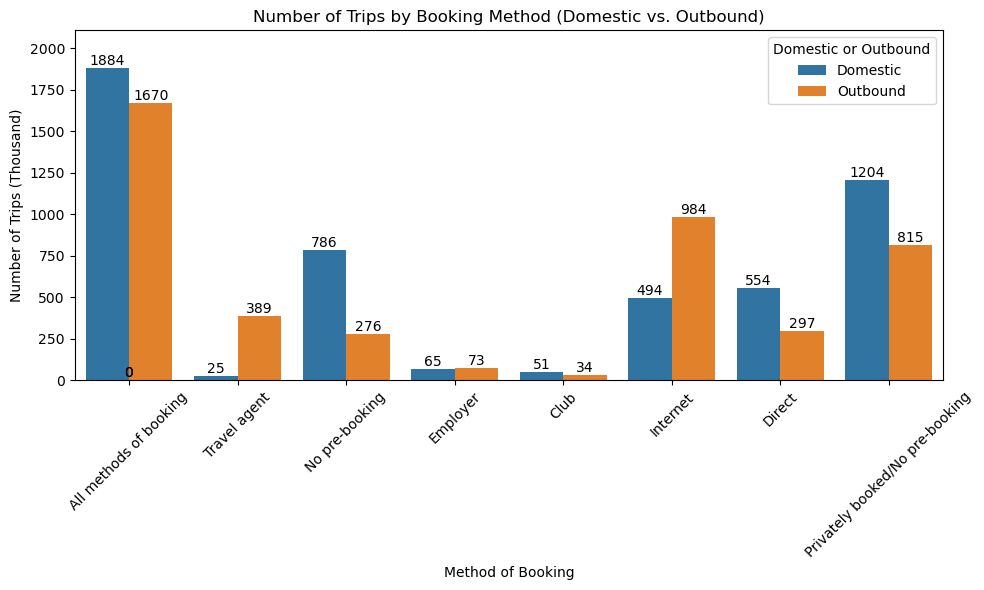

In [49]:
# Filter for 'Number of Trips by Irish Residents'
df_trips = df_merged[df_merged['Statistic Label'] == 'Number of Trips by Irish Residents']

plt.figure(figsize=(10, 6))
sns.barplot(data=df_trips, x='Method of Booking', y='VALUE', hue='Domestic or Outbound', errwidth = 0)
plt.title('Number of Trips by Booking Method (Domestic vs. Outbound)')
plt.xlabel('Method of Booking')
plt.ylabel('Number of Trips (Thousand)')
plt.xticks(rotation=45)

# Adding data labels
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.0f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [50]:
# Box Plot for Distribution of Length of Stay (Domestic vs. Outbound)

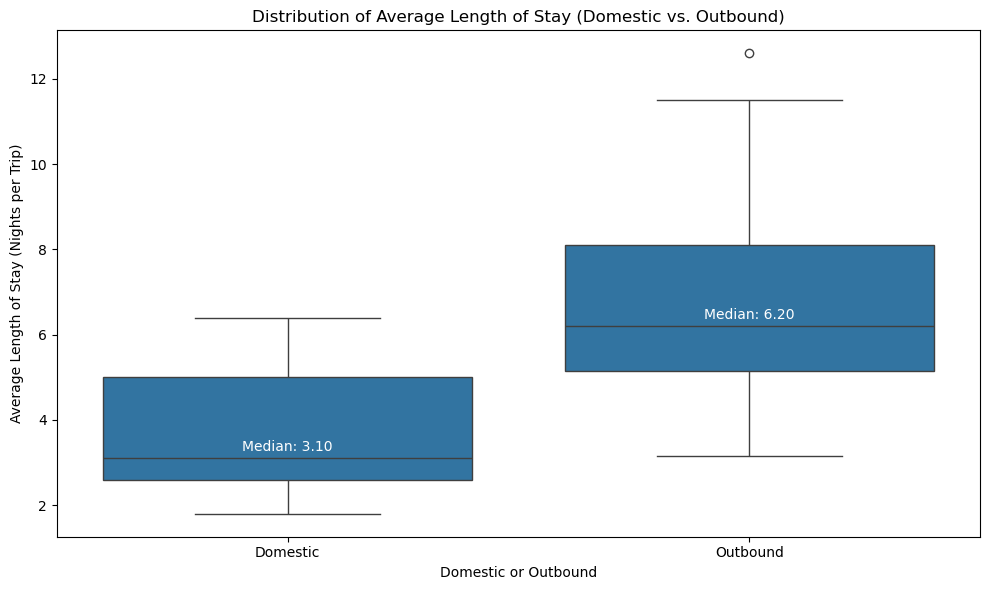

In [51]:
# Filter for 'Average Length of Stay by Irish Residents'
df_length_of_stay = df_merged[df_merged['Statistic Label'] == 'Average Length of Stay by Irish Residents']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_length_of_stay, x='Domestic or Outbound', y='VALUE')
plt.title('Distribution of Average Length of Stay (Domestic vs. Outbound)')
plt.xlabel('Domestic or Outbound')
plt.ylabel('Average Length of Stay (Nights per Trip)')

# Adding data labels for median values
medians = df_length_of_stay.groupby('Domestic or Outbound')['VALUE'].median().values
for i, median in enumerate(medians):
    plt.text(i, median + 0.1, f'Median: {median:.2f}', ha='center', va='bottom', color='white')

plt.tight_layout()
plt.show()

In [52]:
# Heatmap for Correlation Between Travel Statistics

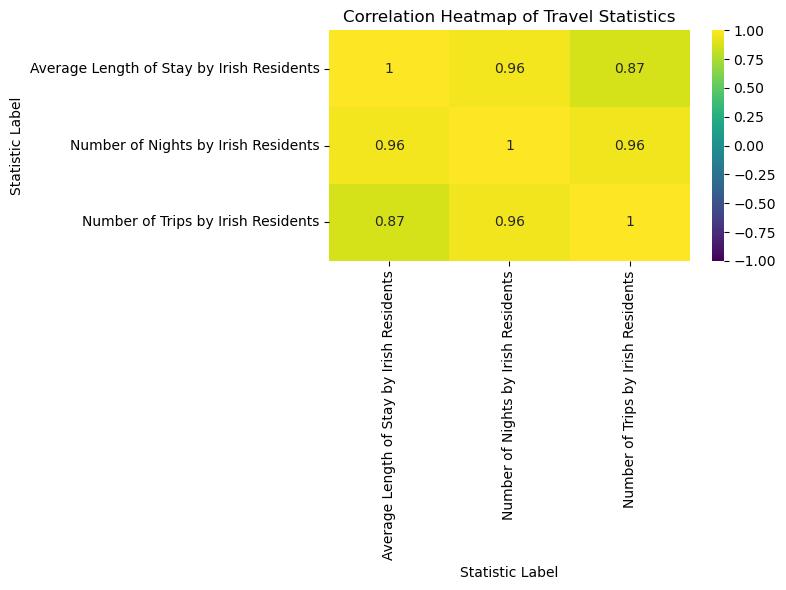

In [53]:
# Pivot the data for correlation heatmap
df_heatmap = df_merged.pivot_table(index='Quarter', columns='Statistic Label', values='VALUE').fillna(0)

# Calculate the correlation matrix
correlation = df_heatmap.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Travel Statistics')
plt.tight_layout()
plt.show()

## Data Preprocessing

### Checking duplicate values

In [54]:
df_merged.duplicated().sum()

0

### Checking Missing values

In [55]:
df_merged.isnull().sum()

Method of Booking       0
Domestic or Outbound    0
Quarter                 0
Statistic Label         0
UNIT                    0
VALUE                   0
dtype: int64

### Checking outliers

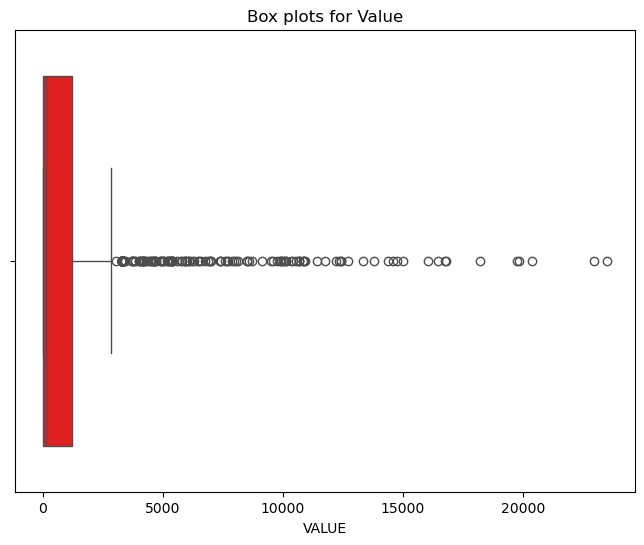

In [56]:
plt.figure(figsize = (8,6))
sns.boxplot(data = df_merged, x = 'VALUE', color = 'red')
plt.title ("Box plots for Value")
plt.show()

## Data transformation

In [57]:
# Extracting Years from date column

In [58]:
# Extract year from Quarter column and create a new column
df_merged['Year'] = df_merged['Quarter'].str[:4]

# Remove 'Q1', 'Q2', 'Q3', 'Q4' from the Quarter column
df_merged['Quarter'] = df_merged['Quarter'].str.replace(r'Q[1-4]', '')
df_merged.head()

,Method of Booking,Domestic or Outbound,Quarter,Statistic Label,UNIT,VALUE,Year
0,All methods of booking,Domestic,2003Q1,Number of Trips by Irish Residents,Thousand,1447.0,2003
3,All methods of booking,Domestic,2003Q2,Number of Trips by Irish Residents,Thousand,1509.0,2003
6,All methods of booking,Domestic,2003Q3,Number of Trips by Irish Residents,Thousand,2087.0,2003
9,All methods of booking,Domestic,2003Q4,Number of Trips by Irish Residents,Thousand,1614.0,2003
12,All methods of booking,Domestic,2004Q1,Number of Trips by Irish Residents,Thousand,1585.0,2004


In [59]:
# Dropping the 'Quarter Column'

In [60]:
df_merged = df_merged.drop(columns = ['Quarter'])

In [61]:
df_merged.head()

,Method of Booking,Domestic or Outbound,Statistic Label,UNIT,VALUE,Year
0,All methods of booking,Domestic,Number of Trips by Irish Residents,Thousand,1447.0,2003
3,All methods of booking,Domestic,Number of Trips by Irish Residents,Thousand,1509.0,2003
6,All methods of booking,Domestic,Number of Trips by Irish Residents,Thousand,2087.0,2003
9,All methods of booking,Domestic,Number of Trips by Irish Residents,Thousand,1614.0,2003
12,All methods of booking,Domestic,Number of Trips by Irish Residents,Thousand,1585.0,2004


### Feature selection and data splitting

In [62]:
# Separate the features (X) and the target variable (y)
X = df_merged[['Method of Booking', 'Domestic or Outbound', 'Statistic Label','Year']]
y = df_merged['VALUE']  # This is now the continuous target variable for regression

In [63]:
X

,Method of Booking,Domestic or Outbound,Statistic Label,Year
0,All methods of booking,Domestic,Number of Trips by Irish Residents,2003
3,All methods of booking,Domestic,Number of Trips by Irish Residents,2003
6,All methods of booking,Domestic,Number of Trips by Irish Residents,2003
9,All methods of booking,Domestic,Number of Trips by Irish Residents,2003
12,All methods of booking,Domestic,Number of Trips by Irish Residents,2004
...,...,...,...,...
1331,Privately booked/No pre-booking,Outbound,Average Length of Stay by Irish Residents,2008
1334,Privately booked/No pre-booking,Outbound,Average Length of Stay by Irish Residents,2009
1337,Privately booked/No pre-booking,Outbound,Average Length of Stay by Irish Residents,2009
1340,Privately booked/No pre-booking,Outbound,Average Length of Stay by Irish Residents,2009


In [64]:
### Categorical encoding for categorical features

In [65]:
# Encode categorical variables using one-hot encoding
categorical_features = ['Method of Booking', 'Domestic or Outbound', 'Statistic Label']

In [66]:
# Apply label encoding to categorical columns that have a small number of unique values
label_encoder = LabelEncoder()
for feature in categorical_features:
    if len(X[feature].unique()) <= 10:
        X[feature] = label_encoder.fit_transform(X[feature])

In [67]:
X

,Method of Booking,Domestic or Outbound,Statistic Label,Year
0,0,0,2,2003
3,0,0,2,2003
6,0,0,2,2003
9,0,0,2,2003
12,0,0,2,2004
...,...,...,...,...
1331,6,1,0,2008
1334,6,1,0,2009
1337,6,1,0,2009
1340,6,1,0,2009


### Data splitting

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [69]:
X_train.shape

(1075, 4)

In [70]:
X_test.shape

(269, 4)

## Supervised Learning: Regression

### Bagging Regressor

In [71]:
from sklearn.ensemble import BaggingRegressor

In [72]:
# Initialize the Bagging Regressor
bagging_model = BaggingRegressor(random_state=42)

In [73]:
# Train the model
bagging_model.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [74]:
# Make predictions
bagging_pred = bagging_model.predict(X_test)

In [75]:
# Calculate R2 score
bagging_r2 = r2_score(y_test, bagging_pred)
print(f'R2-score of the Bagging Regressor (without tuning) is: {bagging_r2:.2f}')

# Calculate Mean Squared Error
bagging_mse = mean_squared_error(y_test, bagging_pred)
print(f'MSE of the Bagging Regressor (without tuning) is: {bagging_mse:.2f}')

# Calculate Mean Absolute Error
bagging_mae = mean_absolute_error(y_test, bagging_pred)
print(f'MAE of the Bagging Regressor (without tuning) is: {bagging_mae:.2f}')

R2-score of the Bagging Regressor (without tuning) is: 0.77
MSE of the Bagging Regressor (without tuning) is: 1166303.75
MAE of the Bagging Regressor (without tuning) is: 397.25


### Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf = RandomForestRegressor(n_estimators = 500, max_depth = 8, random_state = 42)

In [78]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=500, random_state=42)

In [79]:
rf_pred = rf.predict(X_test)

In [80]:
rf_r2 = r2_score(y_test, rf_pred)
print (f'R2-score of the Random Forest Model (without tuning) is: {rf_r2:.2f}')

rf_mse = mean_squared_error(y_test, rf_pred)
print (f'MSE of the Random Forest Model (without tuning) is: {rf_mse:.2f}')

rf_mae = mean_absolute_error(y_test, rf_pred)
print(f'MAE of the Random Forest Regressor (without tuning) is: {rf_mae:.2f}')

R2-score of the Random Forest Model (without tuning) is: 0.82
MSE of the Random Forest Model (without tuning) is: 910885.24
MAE of the Random Forest Regressor (without tuning) is: 364.75


### Gradient Boost Regressor

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
# Initialize the Gradient Boosting Regressor with default parameters
gbr = GradientBoostingRegressor(random_state=42)

In [83]:
# Train the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [84]:
#Make predictions
gbr_pred = gbr.predict(X_test)

In [85]:
# Calculate R2 score
gbr_r2 = r2_score(y_test, gbr_pred)
print(f'R2-score of the Gradient Boosting Regressor (without tuning) is: {gbr_r2:.2f}')

# Calculate Mean Squared Error
gbr_mse = mean_squared_error(y_test, gbr_pred)
print(f'MSE of the Gradient Boosting Regressor (without tuning) is: {gbr_mse:.2f}')

# Calculate Mean Absolute Error
gbr_mae = mean_absolute_error(y_test, gbr_pred)
print(f'MAE of the Gradient Boosting Regressor (without tuning) is: {gbr_mae:.2f}')

R2-score of the Gradient Boosting Regressor (without tuning) is: 0.72
MSE of the Gradient Boosting Regressor (without tuning) is: 1417763.99
MAE of the Gradient Boosting Regressor (without tuning) is: 670.82


### Hyperparameter Optimisation for Bagging Regressor

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# Define the parameter grid for Bagging Regressor
param_grid = {
    'n_estimators': [10, 50, 100],           # Number of base estimators
    'max_samples': [0.5, 0.7, 1.0],          # Fraction of samples used for training each base estimator
    'max_features': [0.5, 0.7, 1.0],         # Fraction of features used for training each base estimator
    'bootstrap': [True, False]               # Use bootstrapping or not
}

# Initialize the Bagging Regressor
bagging_model_tuned = BaggingRegressor(random_state=42)

In [88]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=bagging_model_tuned, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='r2')

In [89]:
# Get the best model from GridSearchCV
best_bagging_model = grid_search.best_estimator_

In [90]:
# Make predictions
tuned_bagging_pred = best_bagging_model.predict(X_test)

In [91]:
# Calculate R2 score
tuned_bagging_r2 = r2_score(y_test, tuned_bagging_pred)
print(f'R2-score of the Bagging Regressor (with tuning) is: {tuned_bagging_r2:.2f}')

# Calculate Mean Squared Error
tuned_bagging_mse = mean_squared_error(y_test, tuned_bagging_pred)
print(f'MSE of the Bagging Regressor (with tuning) is: {tuned_bagging_mse:.2f}')

# Calculate Mean Absolute Error
tuned_bagging_mae = mean_absolute_error(y_test, tuned_bagging_pred)
print(f'MAE of the Bagging Regressor (with tuning) is: {tuned_bagging_mae:.2f}')

R2-score of the Bagging Regressor (with tuning) is: 0.81
MSE of the Bagging Regressor (with tuning) is: 973471.17
MAE of the Bagging Regressor (with tuning) is: 365.48


### Hyperparameter optimisation for Random Forest Regressor

In [92]:
param_grid = {
    'n_estimators': [100, 200, 300, 500, 700],  # Number of trees in the forest
    'max_depth': [None, 5, 8, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

In [93]:
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores
    verbose=1  # Print the progress
)

In [94]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 8, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500, 700]},
             scoring='neg_mean_squared_error', verbose=1)

In [95]:
best_params = grid_search_rf.best_params_
best_score = -grid_search_rf.best_score_  # Convert to positive since neg_mean_squared_error has been used

print(f'Best Parameters: {best_params}')
print(f'Best MSE Score from Cross-Validation: {best_score:.2f}')

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best MSE Score from Cross-Validation: 1975274.48


In [96]:
best_model = grid_search_rf.best_estimator_
rf_pred = best_model.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

print(f'R2-score of the Random Forest Model (with tuning) is: {rf_r2:.2f}')
print(f'MSE of the Random Forest Model (with tuning) is: {rf_mse:.2f}')
print(f'MAE of the Random Forest Model (with tuning) is: {rf_mae:.2f}')

R2-score of the Random Forest Model (with tuning) is: 0.82
MSE of the Random Forest Model (with tuning) is: 917375.31
MAE of the Random Forest Model (with tuning) is: 422.28


### Hyperparameter optimisation for Gradient Boost Regressor

In [97]:
# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

In [98]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

In [99]:
# Train the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [100]:
# Get the best model
best_gb_model = grid_search.best_estimator_

In [101]:
# Make predictions
best_gb_pred = best_gb_model.predict(X_test)

In [102]:
# Calculate R2 score
best_gb_r2 = r2_score(y_test, best_gb_pred)
print(f'R2-score of the Best Gradient Boosting Regressor (with tuning) is: {best_gb_r2:.2f}')

# Calculate Mean Squared Error
best_gb_mse = mean_squared_error(y_test, best_gb_pred)
print(f'MSE of the Best Gradient Boosting Regressor (with tuning) is: {best_gb_mse:.2f}')

# Calculate Mean Absolute Error
best_gb_mae = mean_absolute_error(y_test, best_gb_pred)
print(f'MAE of the Best Gradient Boosting Regressor (with tuning) is: {best_gb_mae:.2f}')

R2-score of the Best Gradient Boosting Regressor (with tuning) is: 0.81
MSE of the Best Gradient Boosting Regressor (with tuning) is: 965424.10
MAE of the Best Gradient Boosting Regressor (with tuning) is: 468.90


### Model comparisions

In [103]:
# Store each model's performance metrics in dictionaries
r2_scores = {
    'Bagging (Untuned)': bagging_r2,
    'Bagging (Tuned)': tuned_bagging_r2,
    'Random Forest (Untuned)': rf_r2,
    'Random Forest (Tuned)': rf_r2,
    'Gradient Boosting (Untuned)': gbr_r2,
    'Gradient Boosting (Tuned)': best_gb_r2
}

mse_scores = {
    'Bagging (Untuned)': bagging_mse,
    'Bagging (Tuned)': tuned_bagging_mse,
    'Random Forest (Untuned)': rf_mse,
    'Random Forest (Tuned)': rf_mse,
    'Gradient Boosting (Untuned)': gbr_mse,
    'Gradient Boosting (Tuned)': best_gb_mse
}

mae_scores = {
    'Bagging (Untuned)': bagging_mae,
    'Bagging (Tuned)': tuned_bagging_mae,
    'Random Forest (Untuned)': rf_mae,
    'Random Forest (Tuned)': rf_mae,
    'Gradient Boosting (Untuned)': gbr_mae,
    'Gradient Boosting (Tuned)': best_gb_mae
}

# Create a DataFrame to hold scores for easier ranking
results_df = pd.DataFrame({
    'Model': list(r2_scores.keys()),
    'R2 Score': list(r2_scores.values()),
    'MSE': list(mse_scores.values()),
    'MAE': list(mae_scores.values())
})

# Rank each model for each metric (higher R² is better, lower MSE and MAE are better)
results_df['R2 Rank'] = results_df['R2 Score'].rank(ascending=False)
results_df['MSE Rank'] = results_df['MSE'].rank(ascending=True)
results_df['MAE Rank'] = results_df['MAE'].rank(ascending=True)

# Calculate the total rank by summing ranks across metrics
results_df['Total Rank'] = results_df[['R2 Rank', 'MSE Rank', 'MAE Rank']].sum(axis=1)

# Identify the best model based on the lowest total rank
best_model_row = results_df.loc[results_df['Total Rank'].idxmin()]
best_model_name = best_model_row['Model']
print(f"The best model based on R2, MSE, and MAE is: {best_model_name}")
print(best_model_row[['Model', 'R2 Score', 'MSE', 'MAE', 'Total Rank']])

The best model based on R2, MSE, and MAE is: Random Forest (Untuned)
Model         Random Forest (Untuned)
R2 Score                     0.820855
MSE                     917375.305016
MAE                        422.282889
Total Rank                        6.5
Name: 2, dtype: object


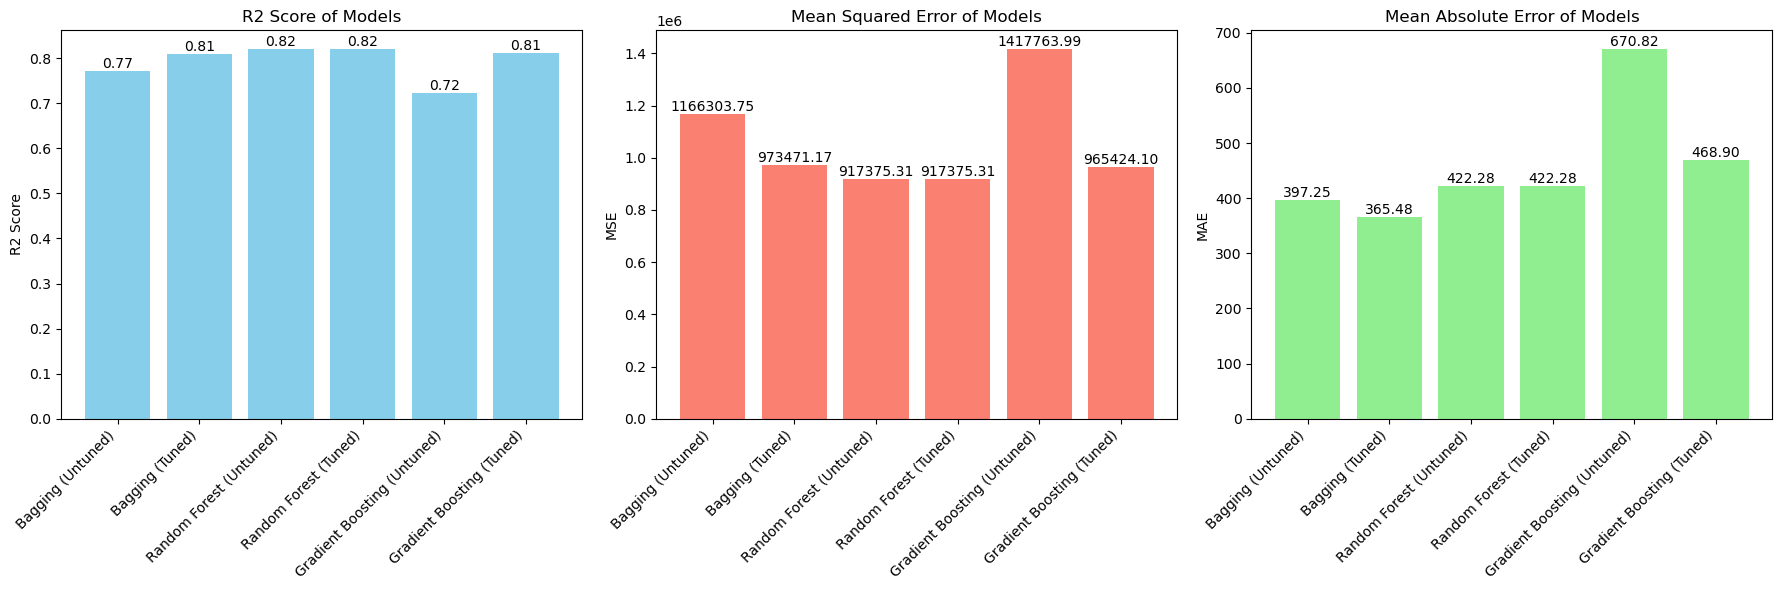

In [104]:
# Bar Graphs for each metric
models = results_df['Model']
r2_values = results_df['R2 Score']
mse_values = results_df['MSE']
mae_values = results_df['MAE']

# Set up the figure and subplots for better visualization
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# R2 Score Plot
bars_r2 = axs[0].bar(models, r2_values, color='skyblue')
axs[0].set_title('R2 Score of Models')
axs[0].set_ylabel('R2 Score')
axs[0].set_xticklabels(models, rotation=45, ha='right')
axs[0].bar_label(bars_r2, fmt='%.2f')

# MSE Plot
bars_mse = axs[1].bar(models, mse_values, color='salmon')
axs[1].set_title('Mean Squared Error of Models')
axs[1].set_ylabel('MSE')
axs[1].set_xticklabels(models, rotation=45, ha='right')
axs[1].bar_label(bars_mse, fmt='%.2f')

# MAE Plot
bars_mae = axs[2].bar(models, mae_values, color='lightgreen')
axs[2].set_title('Mean Absolute Error of Models')
axs[2].set_ylabel('MAE')
axs[2].set_xticklabels(models, rotation=45, ha='right')
axs[2].bar_label(bars_mae, fmt='%.2f')

plt.tight_layout()
plt.show()